In [2]:
# This ensures that our graphs will be shown properly in the notebook.
%matplotlib inline

# Import a few libraries we need
from zipline import run_algorithm

from zipline.api import order_target_percent, record, symbol
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
import pandas as pd

import quandl
quandl.ApiConfig.api_key = 'VqqfBsnjy7pTe1sAp8-Y'


--------------
type(data):<class 'zipline._protocol.BarData'>
type(equities_hist):<class 'pandas.core.frame.DataFrame'>
                           Equity(8 [AAPL])  Equity(290 [AXP])
2017-11-30 00:00:00+00:00            171.85              97.71
2017-12-01 00:00:00+00:00            171.05              97.86
2017-12-04 00:00:00+00:00            169.80              98.59
2017-12-05 00:00:00+00:00            169.64              98.71
2017-12-06 00:00:00+00:00            169.01              98.21


 stock_analytics:                   above_mean  weight
Equity(8 [AAPL])        False     0.0
Equity(290 [AXP])       False     0.0


   stock:Equity(8 [AAPL])  type(analytics): <class 'pandas.core.series.Series'> analytics:**above_mean    False
weight            0**
   stock:Equity(290 [AXP])  type(analytics): <class 'pandas.core.series.Series'> analytics:**above_mean    False
weight            0**
--------------
type(data):<class 'zipline._protocol.BarData'>
type(equities_hist):<class 'pandas.c

/Users/vikram/.local/share/virtualenvs/py_exercise_zipline-uzGlEK1n/lib/python3.6/site-packages/empyrical/stats.py:711: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/Users/vikram/.local/share/virtualenvs/py_exercise_zipline-uzGlEK1n/lib/python3.6/site-packages/empyrical/stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


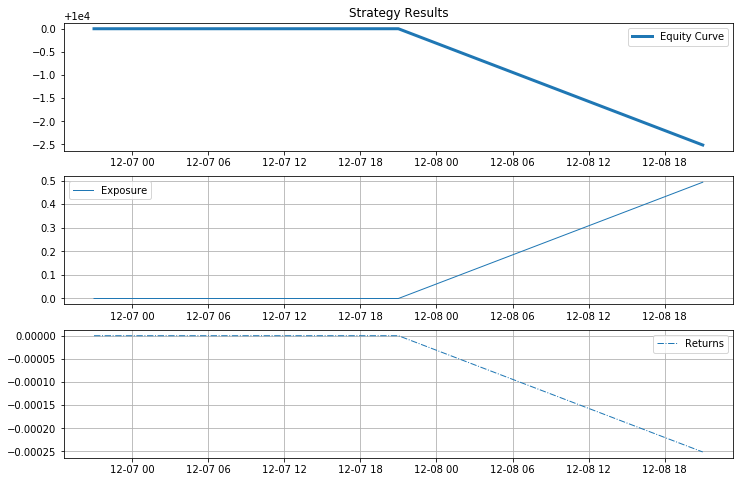

In [14]:
def initialize(context):
        
    # Which stock to trade
    dji = [
        "AAPL",
        "AXP",
    ]
    
    # Make a list of symbols from the list of tickers
    context.dji_symbols = [symbol(s) for s in dji]
    
    # Moving average window
    context.index_average_window = 5
    
def handle_data(context, data):
    # Get history for all the stocks
    stock_hist = data.history(context.dji_symbols, "close", context.index_average_window, "1d")
    print("--------------")
    print(f'type(data):{type(data)}')
    print(f'type(equities_hist):{type(stock_hist)}')
    print(stock_hist)

    
    # Make an empty DataFrame to start with
    stock_analytics = pd.DataFrame()
    
    # Add column for above or below average
    stock_analytics['above_mean'] = stock_hist.iloc[-1] > stock_hist.mean() 
    
    # Set weight for stocks to buy
    stock_analytics.loc[stock_analytics['above_mean'] == True, 'weight'] = 1/len(context.dji_symbols)
    
    # Set weight to zero for the rest
    stock_analytics.loc[stock_analytics['above_mean'] == False, 'weight'] = 0.0
    
    print(f'\n\n stock_analytics:{stock_analytics}\n\n')
    
    
    # Iterate each row and place trades
    for stock, analytics in stock_analytics.iterrows():
        print(f'   stock:{stock}  type(analytics): {type(analytics)} analytics:**{analytics.to_string()}**')
        
        # Check if the stock can be traded
        if data.can_trade(stock):
            # Place the trade
            order_target_percent(stock, analytics['weight'])
            
start = datetime(2017, 12, 6, tzinfo=pytz.UTC)
end = datetime(2017, 12, 10, tzinfo=pytz.UTC)

results = run_algorithm(start=start, end=end, 
                                initialize=initialize, analyze=analyze, 
                                handle_data=handle_data, 
                                capital_base=10000, 
                                data_frequency = 'daily', bundle='quandl' ) 
            


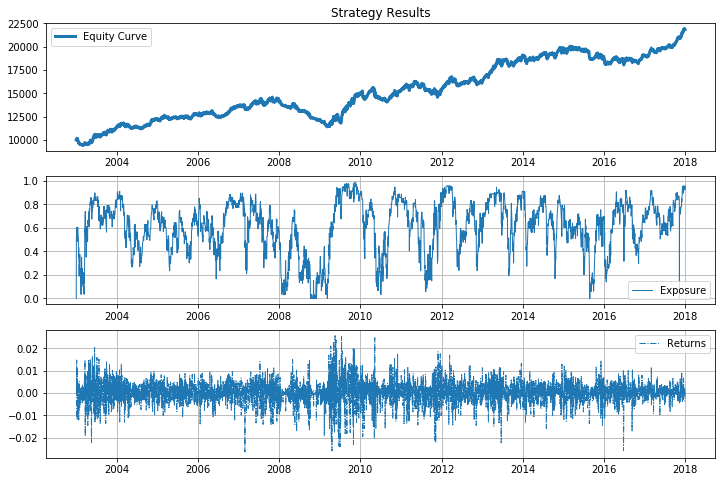

In [15]:

def initialize(context):
    # Which stock to trade
    dji = [
        "AAPL",
        "AXP",
        "BA",
        "CAT",
        "CSCO",
        "CVX",
        "DIS",
        "DWDP",
        "GS",
        "HD",
        "IBM",
        "INTC",
        "JNJ",
        "JPM",
        "KO",
        "MCD",
        "MMM",
        "MRK",
        "MSFT",
        "NKE",
        "PFE",
        "PG",
        "TRV",
        "UNH",
        "UTX",
        "V",
        "VZ",
        "WBA",
        "WMT",
        "XOM",  
    ]
    
    # Make a list of symbols from the list of tickers
    context.dji_symbols = [symbol(s) for s in dji]
    
    # Moving average window
    context.index_average_window = 100
    
def handle_data(context, data):
    # Get history for all the stocks
    stock_hist = data.history(context.dji_symbols, "close", context.index_average_window, "1d")
    
    # Make an empty DataFrame to start with
    stock_analytics = pd.DataFrame()
    
    # Add column for above or below average
    stock_analytics['above_mean'] = stock_hist.iloc[-1] > stock_hist.mean() 
    
    # Set weight for stocks to buy
    stock_analytics.loc[stock_analytics['above_mean'] == True, 'weight'] = 1/len(context.dji_symbols)
    
    # Set weight to zero for the rest
    stock_analytics.loc[stock_analytics['above_mean'] == False, 'weight'] = 0.0
    
    # Iterate each row and place trades
    for stock, analytics in stock_analytics.iterrows():
        # Check if the stock can be traded
        if data.can_trade(stock):
            # Place the trade
            order_target_percent(stock, analytics['weight'])

def analyze(context, perf):
    fig = plt.figure(figsize=(12, 8))
    
    # First chart
    ax = fig.add_subplot(311)
    ax.set_title('Strategy Results')
    ax.plot(perf['portfolio_value'], linestyle='-', 
                label='Equity Curve', linewidth=3.0)
    ax.legend()
    ax.grid(False)
    
    # Second chart
    ax = fig.add_subplot(312)
    ax.plot(perf['gross_leverage'], 
            label='Exposure', linestyle='-', linewidth=1.0)
    ax.legend()
    ax.grid(True)

    # Third chart
    ax = fig.add_subplot(313)
    ax.plot(perf['returns'], label='Returns', linestyle='-.', linewidth=1.0)
    ax.legend()
    ax.grid(True)

# Set start and end date
start = datetime(2003, 1, 1, tzinfo=pytz.UTC)
# start = datetime(2017, 1, 1, tzinfo=pytz.UTC)
end = datetime(2017, 12, 31, tzinfo=pytz.UTC)

# Fire off the backtest
results = run_algorithm(start=start, end=end, 
                                initialize=initialize, analyze=analyze, 
                                handle_data=handle_data, 
                                capital_base=10000, 
                                data_frequency = 'daily', bundle='quandl' ) 
